In [118]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('CO2_Emissions_Canada.csv')

#duplicated data
df_duplicated = df[df.duplicated() == True]
indexs = df_duplicated.index
for i in indexs:
   df.drop(i, axis = 0,inplace = True)


In [119]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [120]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})
df_Make.head(2)


,Make,Count
0,FORD,577
1,CHEVROLET,515


<AxesSubplot:xlabel='Count', ylabel='Make'>

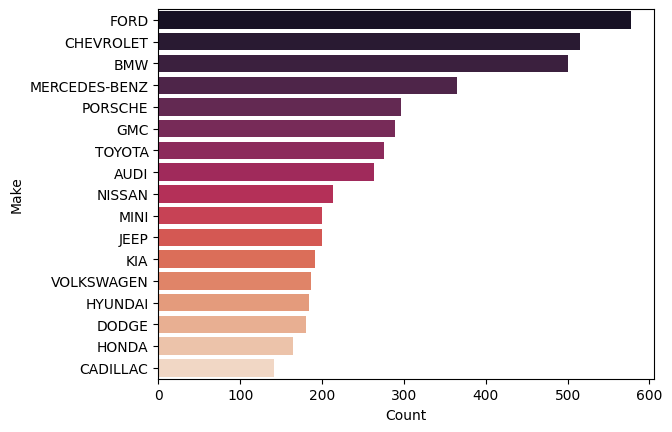

In [121]:
df_Make_x_f= df_Make[0:17]
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
s = df_Make_x_f['Count']
sns.barplot(y='Make',x='Count',data= df_Make_x_f,palette=colors_from_values(s, "rocket_r"))


<AxesSubplot:xlabel='Count', ylabel='Transmission'>

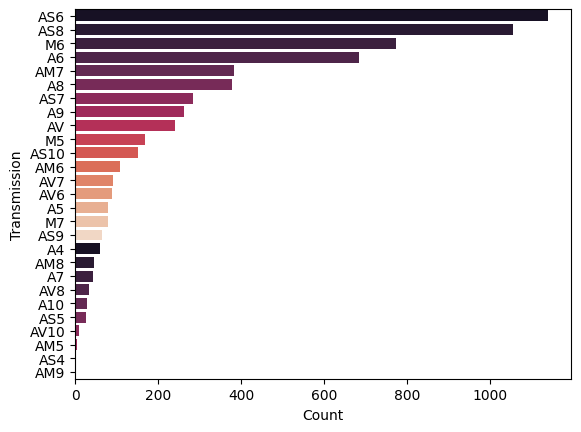

In [122]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

sns.barplot(y= 'Transmission',x= 'Count', data= df_Transmission, palette=colors_from_values(s, "rocket_r"))

In [123]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

fig = go.Figure(go.Bar(
    x=df_Transmission['Transmission'],y=df_Transmission['Count'],
    marker={'color': df_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

## *Data Preprocessing*

In [124]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [125]:
cdf = df[['Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
cdf.head(2)

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221


x
<body>
Fuel type
X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas (none)

X 
Z 
D 
E 
N

In [126]:
Transmissionn = pd.get_dummies(cdf['Transmission'])
Transmissionn.head(5)

,A10,A4,A5,A6,A7,A8,A9,AM5,AM6,AM7,...,AS8,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
Fuel_Type = pd.get_dummies(cdf['Fuel Type'])
Fuel_Type.head(5)

,D,E,N,X,Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [136]:
df2 = pd.concat((cdf, Transmissionn), axis = 1)



In [129]:
df2 = pd.concat((cdf, Fuel_Type), axis = 1)

In [134]:
df2.drop(['Transmission'], axis = 1)


,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),D,E,N,X,Z
0,2.0,4,Z,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,Z,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,Z,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,Z,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,Z,12.1,8.7,10.6,27,244,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,30,219,0,0,0,0,1
7381,2.0,4,Z,11.2,8.3,9.9,29,232,0,0,0,0,1
7382,2.0,4,Z,11.7,8.6,10.3,27,240,0,0,0,0,1
7383,2.0,4,Z,11.2,8.3,9.9,29,232,0,0,0,0,1


In [135]:
df2.drop(['Fuel Type'], axis = 1)

,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),D,E,N,X,Z
0,2.0,4,AS5,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,M6,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,AV7,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,AS6,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,AS6,12.1,8.7,10.6,27,244,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,AS8,10.7,7.7,9.4,30,219,0,0,0,0,1
7381,2.0,4,AS8,11.2,8.3,9.9,29,232,0,0,0,0,1
7382,2.0,4,AS8,11.7,8.6,10.3,27,240,0,0,0,0,1
7383,2.0,4,AS8,11.2,8.3,9.9,29,232,0,0,0,0,1


In [137]:
df2.info(verbose= False)
df2.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Columns: 36 entries, Engine Size(L) to M7
dtypes: float64(4), int64(3), object(2), uint8(27)
memory usage: 656.4+ KB


Index(['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)', 'A10', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5',
       'AM6', 'AM7', 'AM8', 'AM9', 'AS10', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8',
       'AS9', 'AV', 'AV10', 'AV6', 'AV7', 'AV8', 'M5', 'M6', 'M7'],
      dtype='object')

In [144]:
g = sns.lmplot(
    data= df2,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)